In [17]:
#Import the Numpy library
import numpy as np
#Import the Pandas library
import pandas as pd
#Import 'tree' from scikit-learn library
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

In [117]:
# Import the Pandas library
import pandas as pd
# Load the train and test datasets to create two DataFrames
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [23]:
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [25]:
pd.crosstab(train.Sex,train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


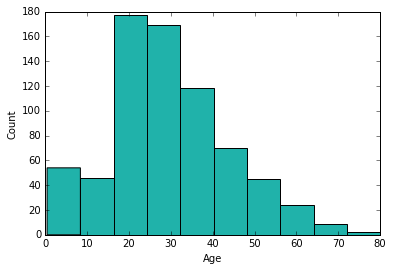

In [26]:
age_notnull = train[train.Age.notnull()]
plt.hist(age_notnull.Age, color = "lightseagreen")
plt.ylabel("Count")
plt.xlabel("Age")

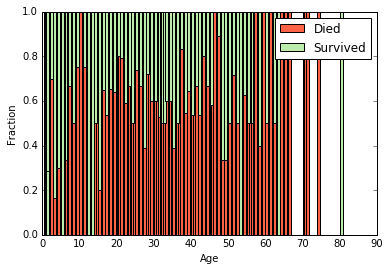

In [31]:
age_survived = pd.crosstab(age_notnull.Age, age_notnull.Survived)
age_survived = age_survived.apply(lambda x: x / x.sum(), axis = 1)
plt.bar(age_survived.index, age_survived[0], color = "tomato", label = "Died")
plt.bar(age_survived.index, age_survived[1], bottom = age_survived[0], color = "lightsage", label = "Survived")
plt.ylabel("Fraction")
plt.xlabel("Age")
plt.legend(loc = "upper right")

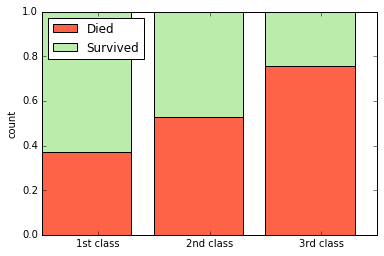

In [40]:
pclass_survived = pd.crosstab(train.Pclass, train.Survived)
pclass_survived = pclass_survived.apply(lambda x: x / x.sum(), axis = 1)
plt.bar(pclass_survived.index, pclass_survived[0], color = "tomato", label = "Died")
plt.bar(pclass_survived.index, pclass_survived[1], bottom = pclass_survived[0], color = "lightsage", label = "Survived")
plt.xticks([1.5,2.5,3.5],["1st class", "2nd class", "3rd class"])
plt.ylabel("count")
plt.legend(loc = "upper left")

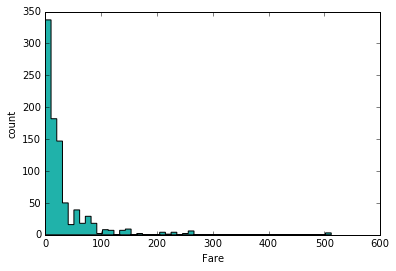

In [41]:
plt.hist(train.Fare, color = "lightseagreen", histtype = "stepfilled", bins = 50)
plt.ylabel("count")
plt.xlabel("Fare")

In [42]:
train.Fare.max()

512.32920000000001

In [44]:
train[train["Fare"] == train.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


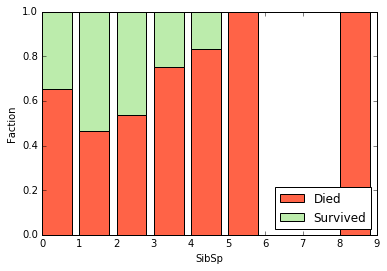

In [65]:
sibsp_survived = pd.crosstab(train.SibSp, train.Survived)
sibsp_survived = sibsp_survived.apply(lambda x: x / x.sum(), axis = 1)
plt.bar(sibsp_survived.index, sibsp_survived[0], color = "tomato", label = "Died")
plt.bar(sibsp_survived.index, sibsp_survived[1], bottom = sibsp_survived[0], color = "lightsage", label = "Survived")
plt.xlabel("SibSp")
plt.ylabel("Faction")
plt.legend(loc = "lower right")

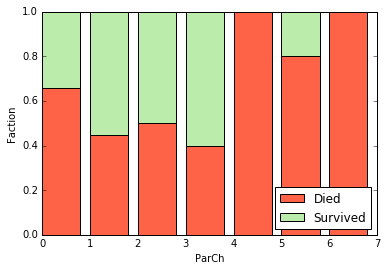

In [66]:
parch_survived = pd.crosstab(train.Parch, train.Survived)
parch_survived = parch_survived.apply(lambda x: x / x.sum(), axis = 1)
plt.bar(parch_survived.index, parch_survived[0], color = "tomato", label = "Died")
plt.bar(parch_survived.index, parch_survived[1], bottom = parch_survived[0], color = "lightsage", label = "Survived")
plt.xlabel("ParCh")
plt.ylabel("Faction")
plt.legend(loc = "lower right")

D:\Program Files\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Program Files\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Program Files\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


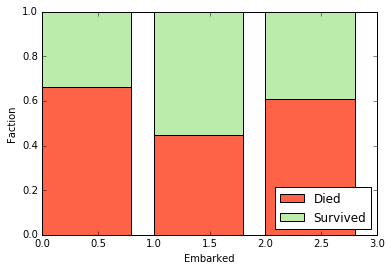

In [127]:
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

embarked_survived = pd.crosstab(train.Embarked, train.Survived)
embarked_survived = embarked_survived.apply(lambda x: x / x.sum(), axis = 1)
plt.bar(embarked_survived.index, embarked_survived[0], color = "tomato", label = "Died")
plt.bar(embarked_survived.index, embarked_survived[1], bottom = embarked_survived[0], color = "lightsage", label = "Survived")
plt.xlabel("Embarked")
plt.ylabel("Faction")
plt.legend(loc = "lower right")

In [97]:
name_list = train.Name.copy()
Title_list = name_list.apply(lambda x: x.split(",")[1])
Title_list = Title_list.apply(lambda x: x.split(" ")[1])
Title_list = Title_list.apply(lambda x: x.split(".")[0])
Surname_list = name_list.apply(lambda x: x.split(",")[0])

In [98]:
Title_list.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Ms            1
Lady          1
the           1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64

Some of these titles can be clubbed together based on the fact that they served similar titular purposes. For example, Mlle is short for mademoiselle, which is the same as Miss in French, while Mme stands for madame, Mrs. in French. There is also a Ms in the list. I clubbed her under Mrs, assuming that if she wasn't old and married, she would rather use Miss. Besides, it's one lonely entry, which wouldn't affect the grouping much, but left alone would increase the classification set size. Major, Capt and Col are all officers. I assumed that the doctors onboard were also responsible people, helping out in time of distress, so I clubbed them under Officer as well. Sir, Jonkheer (dutch), Don are all male nobility, so I grouped them under Sir. Similarly, theCountess is pretty much the same as Lady.

In [111]:
Title_Dictionary = {"Capt":"Officer","Col":"Officer","Major":"Officer","Jonkheer":"Sir",
                   "Don":"Sir","Dr":"Officer","the":"Lady","Dona":"Lady","Mme":"Mrs",
                   "Mlle":"Miss","Ms":"Mrs"}

In [112]:
def reduce_title(title):
    if Title_Dictionary.has_key(title):
        title = Title_Dictionary.get(title)
    return title
New_Titles = Title_list.apply(reduce_title)

In [114]:
New_Titles.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     12
Rev          6
Sir          3
Lady         2
Name: Name, dtype: int64

In [125]:
### Populate missing ages  using RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
def setMissingAges(df):
    
    # Grab all the features that can be included in a Random Forest Regressor
    age_df = df[['Age',"Pclass","Sex","Fare", "SibSp","Parch", "Embarked"]]
    
    # Split into sets with known and unknown Age values
    knownAge = age_df.loc[ (df.Age.notnull()) ]
    unknownAge = age_df.loc[ (df.Age.isnull()) ]
    
    # All age values are stored in a target array
    y = knownAge.values[:, 0]
    
    # All the other values are stored in the feature array
    X = knownAge.values[:, 1::]
    
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(unknownAge.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [129]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train = setMissingAges(train)

D:\Program Files\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Program Files\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [131]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.558998,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.732894,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
df = train.copy()
df['Fare_bin'] = pd.qcut(train['Fare'], 4)

In [136]:
df = pd.concat([df, pd.get_dummies(df['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))], axis=1)

In [139]:
# how many different names do they have? 
import re
df['Names'] = df['Name'].map(lambda x: len(re.split(' ', x)))

In [141]:
df['Title'] = df['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])
 
# Group low-occuring, related titles together
df['Title'][df.Title == 'Jonkheer'] = 'Master'
df['Title'][df.Title.isin(['Ms','Mlle'])] = 'Miss'
df['Title'][df.Title == 'Mme'] = 'Mrs'
df['Title'][df.Title.isin(['Capt', 'Don', 'Major', 'Col', 'Sir'])] = 'Sir'
df['Title'][df.Title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
 
# Build binary features
df = pd.concat([df, pd.get_dummies(df['Title']).rename(columns=lambda x: 'Title_' + str(x))], axis=1)

D:\Program Files\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Program Files\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Program Files\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Program Files\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning

In [ ]:
# Replace missing values with "U0"
df['Cabin'][df.Cabin.isnull()] = 'U0'
 
# Create a feature for the deck
df['Deck'] = df['Cabin'].map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
df['Deck'] = pd.factorize(df['Deck'])[0]
 
# Create binary features for each deck
decks = pd.get_dummies(df['Deck']).rename(columns=lambda x: 'Deck_' + str(x))
df = pd.concat([df, decks], axis=1)
 
# Create feature for the room number
df['Room'] = df['Cabin'].map( lambda x : re.compile("([0-9]+)").search(x).group()).astype(int) + 1